In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

In [67]:
df = sns.load_dataset("exercise")
df.head(5)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [68]:
df["kind"].unique()

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

In [69]:
df["time"].unique()

['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']

In [70]:
df["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [71]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [72]:
df = pd.get_dummies(df,columns=["diet","kind"],drop_first=True)
df.head(5)

,id,pulse,time,diet_low fat,kind_walking,kind_running
0,1,85,1 min,1,0,0
1,1,85,15 min,1,0,0
2,1,88,30 min,1,0,0
3,2,90,1 min,1,0,0
4,2,92,15 min,1,0,0


<Axes: xlabel='id', ylabel='pulse'>

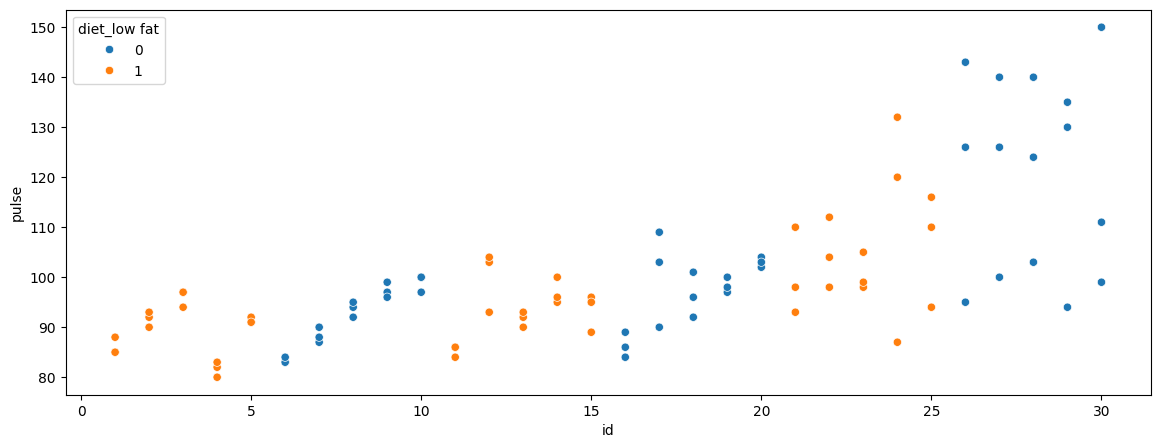

In [74]:
plt.figure(figsize=(14,5))
sns.scatterplot(x=df["id"],y=df["pulse"],hue=df["diet_low fat"])

In [75]:
df.size

540

In [76]:
df["time"] = df["time"].str.replace("min","")
df.head(5)

,id,pulse,time,diet_low fat,kind_walking,kind_running
0,1,85,1,1,0,0
1,1,85,15,1,0,0
2,1,88,30,1,0,0
3,2,90,1,1,0,0
4,2,92,15,1,0,0


In [77]:
x = df.drop("pulse",axis=1)
y = df["pulse"]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=5)

In [79]:
model_linear = LinearRegression().fit(x_train,y_train)

In [80]:
model_linear.score(x_test,y_test)

0.473208286804531

In [86]:
y_pred_linear = model_linear.predict(x_test)

<Axes: xlabel='pulse'>

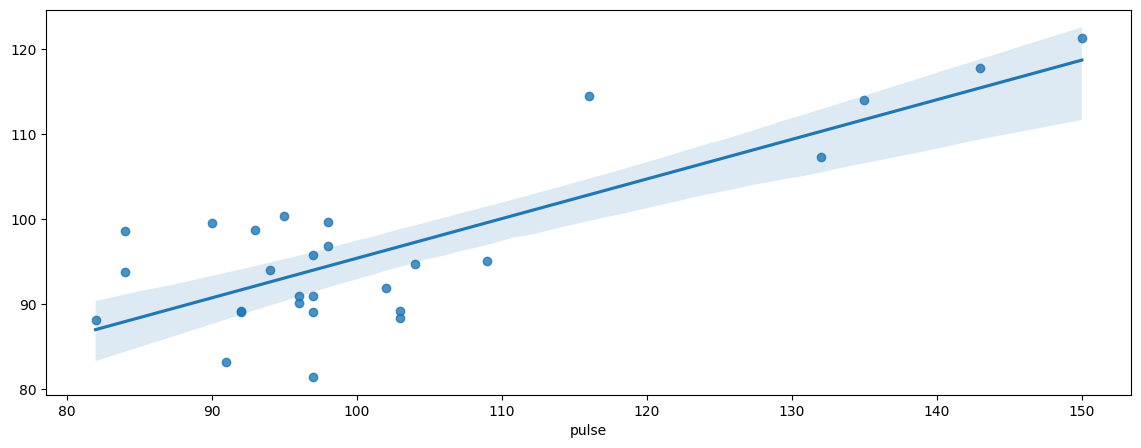

In [88]:
plt.figure(figsize=(14,5))
sns.regplot(x=y_test,y=y_pred_linear)

In [89]:
alphas=[1,10,20,100,200]
y_pred_ridge_dict = {}

for i in alphas:
  model_ridge = Ridge(alpha=i).fit(x_train,y_train)
  y_pred_ridge = model_ridge.predict(x_test)
  y_pred_ridge_dict[f"y_pred_ridge_{i}"] = y_pred_ridge
  score = model_ridge.score(x_test,y_test)
  print(f"Alpha: {i} Coefficient: {model_ridge.coef_}  Skore: {score}")

Alpha: 1 Coefficient: [ 0.84654575  0.42044603 -2.36052411 -6.00889746  2.26747273]  Skore: 0.4745457064263908
Alpha: 10 Coefficient: [ 0.89369821  0.41443666 -1.32119019 -3.82564605  1.65017944]  Skore: 0.48185184020448146
Alpha: 20 Coefficient: [ 0.92002383  0.41118001 -0.86950237 -2.74991974  1.22621911]  Skore: 0.4808072446559003
Alpha: 100 Coefficient: [ 0.95394555  0.4027328  -0.23409942 -0.85061633  0.4217626 ]  Skore: 0.46868947094800395
Alpha: 200 Coefficient: [ 0.94533137  0.39726616 -0.12829804 -0.45696597  0.24686004]  Skore: 0.4610415729574401


In [92]:
y_pred_ridge_dict

{'y_pred_ridge_1': array([ 90.51355111,  89.66700536,  92.06710531,  98.82949714,
        117.6156849 ,  99.26384288,  88.05699105,  89.52746805,
         88.82045961,  95.49678968,  95.41371248,  94.28060431,
         98.41729713,  93.80369817, 100.11038863,  88.76399949,
         83.01729237,  99.67604289, 113.8486317 ,  91.36009686,
         95.12715006,  88.9035368 ,  91.22055956, 114.40861504,
         97.10680398, 121.00186792,  81.32420087, 107.25537883]),
 'y_pred_ridge_10': array([ 92.6903161 ,  91.79661789,  93.57158233,  98.61991583,
        116.42826015,  97.79781475,  87.57898007,  90.8904877 ,
         90.90291968,  94.26235951,  96.69260091,  96.22577135,
         96.90411655,  92.47496309,  98.69151296,  87.56654808,
         82.67056506,  99.51361404, 112.8928049 ,  93.58401431,
         97.11946956,  88.47267828,  92.67788412, 114.21337175,
         98.47999733, 120.00305298,  80.88316865, 107.10312367]),
 'y_pred_ridge_20': array([ 93.77140505,  92.85138122,  94.4045

In [93]:
y_pred_ridge = pd.DataFrame(y_pred_ridge_dict)
y_pred_ridge.head(5)

,y_pred_ridge_1,y_pred_ridge_10,y_pred_ridge_20,y_pred_ridge_100,y_pred_ridge_200
0,90.513551,92.690316,93.771405,95.644324,96.053180
1,89.667005,91.796618,92.851381,94.690378,95.107848
2,92.067105,93.571582,94.404530,95.963837,96.291740
3,98.829497,98.619916,98.431191,97.956062,97.812599
4,117.615685,116.428260,115.825032,114.639141,114.188273


<Axes: >

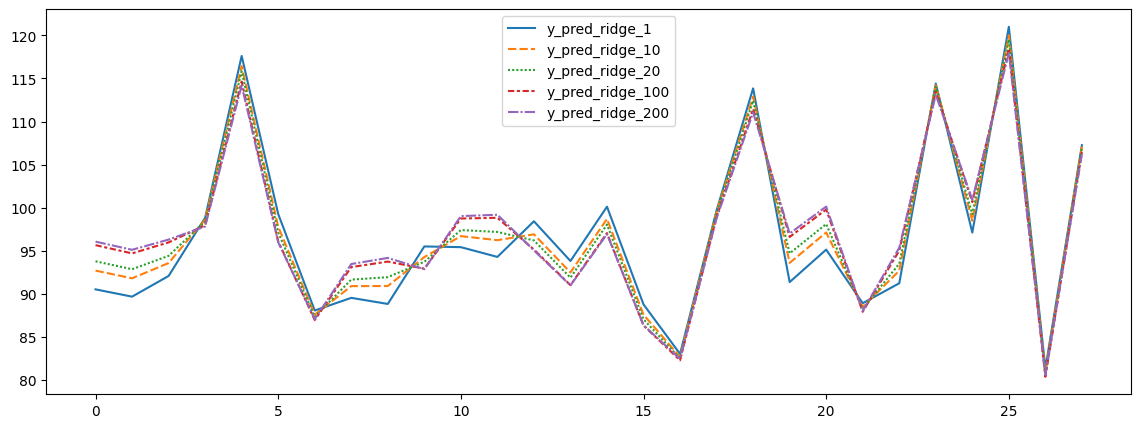

In [95]:
plt.figure(figsize=(14,5))
sns.lineplot(y_pred_ridge)